# Weather forecasting using K-Means Techniques 

### Abstract
Data mining is a popular concept of mined necessary data from a large set of data. Data mining using clustering is a powerful way to analyze
data and gives prediction.<br> **In this project non structural data is used to forecast daily average temperature, humidity, pressure and wind speed of provinces of Italy.**<br> The final step, the result will be calculated on the basis of priority based protocol which is defined based on some mathematical deduction and considerations.


## 1. Introduction

In our human society, products deriving from **agriculture** are one of the essential food, production of the crop is directly depends on the weather. If we predict weather, it will be benefited our farmers and also makes an effect on the national growth. It's very important because it lets people know what is coming and how good/bad the weather will be. With the help of previous storage data, it is possible to predict weather. Analysis and probability give accurate result for prediction. Weather warnings are an important forecast as because it is used to protect human life and wealth. Today's advanced technology is used to find out the pattern of data which have an ability to predict the future atmosphere.<br>
Prediction for **car traffic** is another main focus based on weather condition.<br>
Last but not least are useful predictions for **tourism** purpose.
Use of some specific models or techniques is to find out the tendency of the weather on that particular zone. In a few
prediction operations, some advanced numerical analysis has been used.


<img src="http://monoglass.com/wp-content/uploads/2016/11/Snow-Traffic.jpg" width="300" style="float:left; margin-right:10px;" ></img> <img src="https://ichef.bbci.co.uk/images/ic/720x405/p06g115h.jpg" width="240" style="float:left;margin-right:10px; padding-top:0px; margin:0px; margin-right:10px;" ></img>
<img src="https://i.ytimg.com/vi/PazxBbSKFak/maxresdefault.jpg" width="240" style="margin-left:10px;" > </img>

## 2. Related Work
There are several applications that are used for weather prediction. The same approach is also used in population forecasting,
voting forecasting, etc. use K-Means clustering on the list of weather category will be developed
based on maximum mean values of the cluster. If some new data come, then use incremental K-means of those data. The
use of incremental K-means clustering algorithm, it evaluates the particular point of change in the database which performs
better than the existing K-means clustering by changing threshold values. Incremental K-means clustering algorithm
which is applicable in the periodically incremental environment and dealing with a bulk number of updates. K-Means
clustering algorithm is applied to a dynamic database where the data may be frequently updated. Weather forecasting also
be done by using artificial neural network.<br>
The source of weather data is from yahoo weather portal using a *Yahoo-weather-API* (`https://developer.yahoo.com/weather/`). *Data obtained is a live data and is updated on daily basis.*<br>
The source of the italian provinces comes from `http://www.comuni-italiani.it/province.html`<br>
The above sources will be **merged, cleaned and normalized**.<br><br>
The next step is **statistical description, pricipal component analysis(PCA), outlier detection to be removed and K-Means**. <br>
To achieve the taget we will use the following python libreries:
- Weather-api 
- Folium 
- BeautifulSoup
- yweather
- scikit-learn

## 3. Related Methods
#### 3.1 Data mining
 Data mining is a process which gives knowledge about the dataframe. It applies more computational technique for
statistics, machine learning and pattern reorganization of a large database. <br>
<img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/data-mining.png" width="600"></img>

### 3.2 Principal component analysis (PCA)
Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.
PCA achieves dimension reduction by creating new, artificial variables called principal components. Each principal component is a linear combination of the observed variables.
PCA is an unsupervised method, meaning that no information about groups is used in the dimension reduction. This means that PCA shows a visual representation of the dominant patterns in a data set.
<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Principal_Component_Analysis_of_the_Italian_population.png" width="320px" style="align:center; margin-top: 20px;"></img>

### 3.3 Incremental K-means
K means is a technique where count all values in the cluster. Firstly, identify the K cluster center; depending on the k
Cluster centers create a cluster. Now the mean value of the cluster is called K-means. In Incremental K-means, data can be
inserted at any time. When new data inserted into database, choose nearest cluster and it inserts to that cluster. Find out the new mean value of that cluster. Incremental clustering is designed using the cluster‟s metadata captured from the K-Means results.
<img src="https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/11/02/k-means-sagemaker-1.gif" width="340"></img>

# 4. Project development (code)
### 4.1 install missing libraries

In [105]:
!python -m pip install --upgrade pip
!pip install PyHamcrest
!pip install weather-api --upgrade
!pip install yweather
!pip install folium

Requirement already up-to-date: pip in c:\programdata\anaconda3\lib\site-packages (18.1)
Requirement already up-to-date: weather-api in c:\programdata\anaconda3\lib\site-packages (1.0.6)


### 4.2 Data collection 
#### 4.2.1 Web Scraping using BeautifulSoup python library + yweather.Client()

Grabbing italian provinces name from 'http://www.comuni-italiani.it/province.html' and normalize to get the WOEID using the yweather library

In [106]:
import yweather
from weather import Weather, Unit
from bs4 import BeautifulSoup
import requests

# we use yweather to capture woeid
client = yweather.Client()
html_doc = 'http://www.comuni-italiani.it/province.html'
result = requests.get(html_doc)
soup = BeautifulSoup(result.text, 'html.parser')
table = soup.findAll('table')[1]
links = table.findAll('a')
province=[]

for i in links:
    province.append(i.text[0:25].replace('-',' ').replace("'","").replace('Lodi','Lodi Italia').strip().lower())
    
def get_fetch_woeid(i):
    res = client.fetch_woeid(i)
    if res == '' or res =='None' :
        res = client.fetch_woeid(i+' ')
#    print(i, res)
    return res
    
list_province = []
for i in province:
    list_province.append(get_fetch_woeid(i))
    
print("WOEID captured: completed!")
print("This is the result of the first 5 captured woeid: {}".format(list_province[0:5]))

WOEID captured: completed!
This is the result of the first 5 captured woeid: ['709859', '709961', '710129', '710203', '710284']


#### 4.2.2 Get condition lables weather through the 'weather' library
Send woeids to weather.lookup() and grab lot of informations: _city, generic weather condition, temperature, humidity, pressure, visibility, wind speed, latitude and longitude_.

In [107]:
import pandas as pd
weather = Weather(unit=Unit.CELSIUS)

locat ={}
xa=[]

def calcola(location):
    locat['condition']= location.condition.text
    locat['temperature']=location.condition.temp
    locat['humidity']=location.atmosphere.humidity
    locat['pressure']=location.atmosphere.pressure
    locat['visibility']=location.atmosphere.visibility
    locat['latitude']=location.latitude
    locat['longitude']=location.longitude
    locat['city']=location.location.city
    locat['wind_speed']=location.wind.speed
    return locat

for i in range(0,len(list_province)):
    location = weather.lookup(list_province[i])
#   print(list_province[i])
    xa.insert(i, calcola(location).copy())
    
x=pd.DataFrame.from_dict(xa)



### 4.3 Data conversion
Convert to float

In [108]:
x.humidity = x.humidity.astype(float)
x.latitude = x.latitude.astype(float)
x.longitude = x.longitude.astype(float)
x.pressure = x.pressure.astype(float)
x.temperature = x.temperature.astype(float)
x.visibility = x.visibility.astype(float)
x.wind_speed = x.wind_speed.astype(float)

x.dtypes

city            object
condition       object
humidity       float64
latitude       float64
longitude      float64
pressure       float64
temperature    float64
visibility     float64
wind_speed     float64
dtype: object

In [109]:
x.sort_values(['condition','temperature'], ascending=False)

,city,condition,humidity,latitude,longitude,pressure,temperature,visibility,wind_speed
40,Grosseto,Sunny,48.0,42.768841,11.110720,34608.91,14.0,25.91,4.83
70,Sambuceto,Sunny,42.0,42.429981,14.188360,34676.63,13.0,25.91,3.22
0,Agrigento,Sunny,52.0,37.310730,13.583460,34100.95,12.0,25.91,24.14
25,Chieti,Sunny,43.0,42.348789,14.168360,34270.27,12.0,25.91,3.22
45,Latina,Sunny,37.0,41.462021,12.901170,34845.95,12.0,25.91,3.22
48,Leghorn,Sunny,56.0,43.551201,10.322400,34744.36,12.0,25.91,4.83
83,Rome,Sunny,38.0,41.898399,12.495600,34744.36,12.0,25.91,1.61
97,Trapani,Sunny,59.0,38.016998,12.535000,34541.18,12.0,25.91,27.36
109,Viterbo,Sunny,41.0,42.425480,12.105680,33355.94,12.0,25.91,6.44
37,Frosinone,Sunny,35.0,41.633400,13.323200,33660.72,11.0,25.91,4.83


### 4.4 Descriptive analysis
#### 4.4.1 Eliminate outliers (scikit-learn - MinMaxScaler)
- we need to eliminate outliers : Virtual appearence of outliers after scaling.
- Reason : A more robust machine learning algorithm should be made,free from noise.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

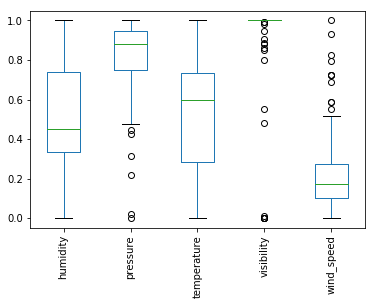

In [110]:
import matplotlib.pyplot as plt

xclean = x.drop(columns=['city','latitude','longitude','condition'])

from sklearn.preprocessing import MinMaxScaler    
scaler=MinMaxScaler()
xscaled=pd.DataFrame(scaler.fit_transform(xclean),columns=xclean.columns)
xscaled.plot.box()
plt.xticks(rotation=90)
plt.show()

Even after scaling all the variables are not distributed normally: because they data values may be sparsely distributed. So, need of principal components: Reducing attributes and capturing the same variance from the original data.

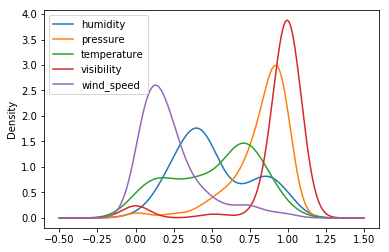

In [111]:
xscaled.plot.density()
plt.show()

After performing PCA, checking whether the co-relation exists using the graph.In the above case we can infer that we have uncorrelated Principle components.

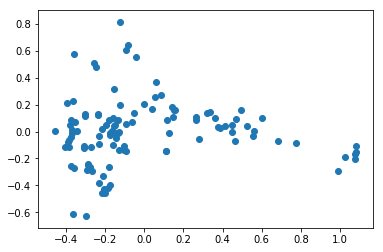

In [112]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PC=pca.fit_transform(xscaled)
pdf=pd.DataFrame(data=PC,columns=['A','B'])
plt.scatter(pdf['A'],pdf['B'])

Outlier problem is solved by PCA.

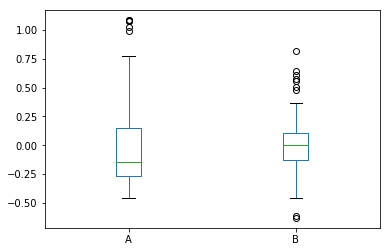

In [113]:
# PCA for outlier detection
## We overcame the problem of outliers using PCA
pdf.plot.box()
plt.show()

Density Plot after PCA:
- Both Closely Follow normal distruibution
- PCA solves normal distribution problem as wel

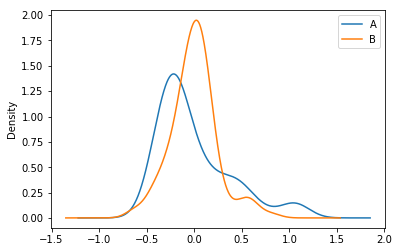

In [114]:
pdf.plot.density()
plt.show()

### 4.5 K-Means
- The above code performs Standard normalization of data.It converts every column vector to the range, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

- The Prinicpal Component analysis is utilized for eliminating dimensions.As all the data available is in different dimensions,PCA can be utilized to eliminate dimensions- number of components is given to be 2(dimensions).

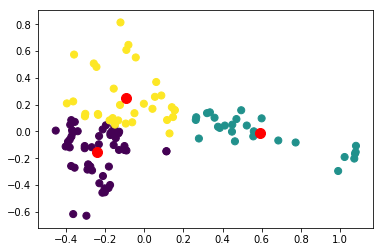

In [115]:
#Kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3).fit(pdf)
y_kmeans=km.predict(pdf)
plt.scatter(pdf['A'], pdf['B'], c=y_kmeans, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1);
plt.show()

add colors for k-means groups to dataframe

In [116]:
labels=pd.DataFrame.from_dict(y_kmeans,dtype='float')
x=x.join(labels)
x=x.rename(columns={0:'labels'})
x=pd.DataFrame.from_dict(x)
locations = x[['latitude', 'longitude']]
locationlist = locations.values.tolist()

def regioncolors(counter):
    if counter['labels'] == 1:
        return 'darkblue'
    elif counter['labels'] == 0:
        return 'purple'
    elif counter['labels'] == 2:
        return 'green'
    else:
        return 'darkblue'
    
x["color"] = x.apply(regioncolors, axis=1)
x.head()

,city,condition,humidity,latitude,longitude,pressure,temperature,visibility,wind_speed,labels,color
0,Agrigento,Sunny,52.0,37.310730,13.58346,34100.95,12.0,25.91,24.14,0.0,purple
1,Alessandria,Mostly Cloudy,83.0,44.908070,8.61071,34405.72,5.0,25.91,3.22,1.0,darkblue
2,Ancona,Sunny,80.0,43.611698,13.50880,34710.50,8.0,25.91,12.87,0.0,purple
3,Aosta,Partly Cloudy,61.0,45.737000,7.31780,28547.27,6.0,25.91,4.83,2.0,green
4,Arezzo,Sunny,57.0,43.462521,11.86708,33254.35,9.0,25.91,8.05,2.0,green


Print k-means groups

In [117]:
grp1 = x[x['color']=='purple'].reset_index(drop=True).set_index('city')[['humidity','pressure','temperature','visibility','wind_speed']]
grp2 = x[x['color']=='green'].reset_index(drop=True).set_index('city')[['humidity','pressure','temperature','visibility','wind_speed']]
grp3 = x[x['color']=='darkblue'].reset_index(drop=True).set_index('city')[['humidity','pressure','temperature','visibility','wind_speed']]
print("Group 1:")
print(grp1.mean(axis=0))
print("-"*27)
print("Group 2:")
print(grp2.mean(axis=0))
print("-"*27)
print("Group 3:")
print(grp3.mean(axis=0))

Group 1:
humidity          53.176471
pressure       34166.019412
temperature       11.215686
visibility        25.910000
wind_speed        15.368431
dtype: float64
---------------------------
Group 2:
humidity          53.242424
pressure       32575.018485
temperature        7.060606
visibility        25.910000
wind_speed         5.219697
dtype: float64
---------------------------
Group 3:
humidity          91.423077
pressure       34547.690385
temperature        2.115385
visibility        20.270385
wind_speed         9.842308
dtype: float64


### K-Means visualization on italian provinces by weather (3 groups)

In [118]:
import folium

map3 = folium.Map(location=[42.504154,12.646361], tiles='CartoDB Positron', zoom_start=6)
labels = x["city"].values.tolist()
locationlist = x[["latitude","longitude"]].astype(float).values.tolist()

for point in range(0, len(x)):
    folium.Marker(locationlist[point],popup=labels[point], icon=folium.Icon(color=x.loc[point,"color"], icon_color='white', icon='circle', angle=0, prefix='fa')).add_to(map3)


display(map3)

<a href="https://ibb.co/wrGJV5K"><img src="https://i.ibb.co/cXfb04N/2.jpg" alt="2" border="0" width="900px"></a>

#### to be noted as the cities with the minimum and maximum temperatures are grouped in two different k-means categories (two colors)

In [119]:
print(x.loc[x['temperature'] == x['temperature'].min(), ['city','temperature','color','latitude','longitude']].reset_index(drop=True))
print("-"*57)
print(x.loc[x['temperature'] == x['temperature'].max(),['city','temperature','color','latitude','longitude']].reset_index(drop=True))
mintemp = x.loc[x['temperature'] == x['temperature'].min(), ['city','temperature','color','latitude','longitude']]
maxtemp = x.loc[x['temperature'] == x['temperature'].max(),['city','temperature','color','latitude','longitude']]
minmax = mintemp.append(maxtemp)
minmax.reset_index(drop=True)

      city  temperature     color   latitude  longitude
0  Cremona          0.0  darkblue  45.139320   10.02054
1  Ferrara          0.0  darkblue  44.832111   11.61941
2   Mantua          0.0  darkblue  45.153118   10.78475
3   Rovigo          0.0  darkblue  45.074909   11.78852
4   Verona          0.0  darkblue  45.430279   10.98811
---------------------------------------------------------
       city  temperature   color  latitude  longitude
0  Cagliari         15.0  purple   39.2313    9.11825
1  Oristano         15.0  purple   39.8993    8.59338


,city,temperature,color,latitude,longitude
0,Cremona,0.0,darkblue,45.139320,10.02054
1,Ferrara,0.0,darkblue,44.832111,11.61941
2,Mantua,0.0,darkblue,45.153118,10.78475
3,Rovigo,0.0,darkblue,45.074909,11.78852
4,Verona,0.0,darkblue,45.430279,10.98811
5,Cagliari,15.0,purple,39.231300,9.11825
6,Oristano,15.0,purple,39.899300,8.59338


In [120]:
map2 = folium.Map(location=[42.504154,12.646361], tiles='CartoDB Positron', zoom_start=6)
labels = minmax["city"].values.tolist()
locationlist = minmax[["latitude","longitude"]].astype(float).values.tolist()

for point in range(0, len(minmax)):
    folium.Marker(locationlist[point], popup=labels[point], icon=folium.Icon(color=minmax.iloc[point,2], icon_color='black', icon='circle', angle=0, prefix='fa')).add_to(map2)
    
    
display(map2)

<a href="https://ibb.co/vjjwYg6"><img src="https://i.ibb.co/0GGDt8R/3.jpg" alt="3" border="0" width="900px"></a>

### 5 Results
This demonstration of k-means helps us to have a confirmation of a **practical demonstration on the clear climatic differences by geographical area**, north, middle and south, foregone by displayed in practice. North is cold, middle moderate and and south hot.